# Data Preprocessing and Visualization

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

This cell is dedicated to importing all the necessary libraries. Any library that is used further in the project is imported in this cell.

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


First we mount the drive, in which the directory `Data` containing datasets resides.

In [3]:
train = pd.read_csv('/content/drive/MyDrive/Data/Adult_TrainDataset.csv')
test = pd.read_csv('/content/drive/MyDrive/Data/Adult_TestDataset.csv')

Using `pandas`, we store the csv's provided seperately as `train` and `test` variables, indicating train set and test set.

In [4]:
train.shape

(32561, 15)

Here we can conclude that the train dataset initially has 32561 rows (records) and 15 attributes (features).

In [5]:
train.head(100)

,Age,Work_Class,Final_Weight,Education,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours-Per-Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,Local-gov,115585,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,<=50K
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
97,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K


Here we overview the first hundred records to check the representation of missing values. We can see in rows 61, 69 and 77 that some attributes for these records are marked with `?`, which we can immediately conclude is what we are looking for.

In [6]:
train.replace('?', np.nan, inplace=True)
test.replace('?', np.nan, inplace=True)

Here the ?'s are replaced by Numpy `NaN`.

<Axes: >

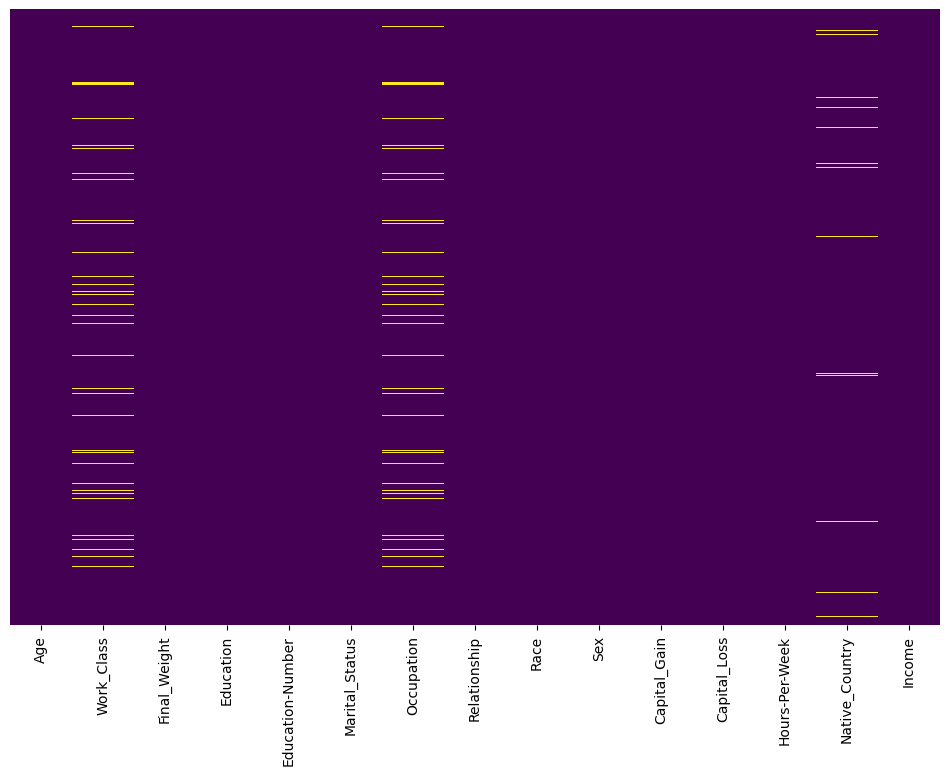

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

This plot helps us to see the records with missing values and their densities and how they are scattered over the attributes in the train set.

In [8]:
train.isnull().sum() * 100 / len(train)

Age                 0.000000
Work_Class          5.638647
Final_Weight        0.000000
Education           0.000000
Education-Number    0.000000
Marital_Status      0.000000
Occupation          5.660146
Relationship        0.000000
Race                0.000000
Sex                 0.000000
Capital_Gain        0.000000
Capital_Loss        0.000000
Hours-Per-Week      0.000000
Native_Country      1.790486
Income              0.000000
dtype: float64

Here we can see the missing percentages for each attribute of training data. The features containing NULL values are `Work_Class`, `Occupation` and `Native_Country`. The missing values are not significantly large in any of the three attributes, and so we can replace them (replacing is generally not good in real world!). 

In [9]:
train['Work_Class'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

We can see that `Work_Class` is a categorical attribute. So we choose to replace the missing values with mode.

In [10]:
train['Work_Class'].fillna(train['Work_Class'].mode()[0], inplace=True)
test['Work_Class'].fillna(train['Work_Class'].mode()[0], inplace=True)

Here the `Work_Class` is replaced with the mode of the attribute in train set, in both train and test data.

In [11]:
train['Occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

We can see that `Occupation` is a categorical attribute as well. So we choose to replace the missing values with mode.

In [12]:
train['Occupation'].fillna(train['Occupation'].mode()[0], inplace=True)
test['Occupation'].fillna(train['Occupation'].mode()[0], inplace=True)

Here the `Occupation` is replaced with the mode of the attribute in train set, in both the train and test data.

In [13]:
train['Native_Country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

We can see that `Occupation` is also a categorical attribute. So we choose to replace the missing values with mode.

In [14]:
train['Native_Country'].fillna(train['Native_Country'].mode()[0], inplace=True)
test['Native_Country'].fillna(train['Native_Country'].mode()[0], inplace=True)

Here missing values for `Native_Country` are replaced with the mode of the attribute in train set, in both the train and test data.

Choosing to replace the missing data is better than removing records and losing information. However it is always better to check for the reason of these missing values, and if possible demand for other information or data as well.

In [15]:
train.isnull().sum() * 100 / len(train)

Age                 0.0
Work_Class          0.0
Final_Weight        0.0
Education           0.0
Education-Number    0.0
Marital_Status      0.0
Occupation          0.0
Relationship        0.0
Race                0.0
Sex                 0.0
Capital_Gain        0.0
Capital_Loss        0.0
Hours-Per-Week      0.0
Native_Country      0.0
Income              0.0
dtype: float64

Checking the missing percentages, it can be seen that there are no missing values remaining anymore.

In [16]:
train.dtypes

Age                  int64
Work_Class          object
Final_Weight         int64
Education           object
Education-Number     int64
Marital_Status      object
Occupation          object
Relationship        object
Race                object
Sex                 object
Capital_Gain         int64
Capital_Loss         int64
Hours-Per-Week       int64
Native_Country      object
Income              object
dtype: object

Now we check the data types to see if categorical and numerical attributes are seperated correctly.

In [17]:
len(train['Education'].unique()) == len(train['Education-Number'].unique())

True

The number of `Education` variables is consistent with the number of `Education-Number` variables. As we see through the features, `Education-Number` has a type of `int64`. This is the corresponding number for `Education`, and can be used for label encoding.

In [18]:
train.drop('Education', axis=1, inplace=True)
test.drop('Education', axis=1, inplace=True)
train = train.astype({'Education-Number': 'object'})
test = test.astype({'Education-Number': 'object'})

So we drop `Education` and keep `Education-Number`, but we change its type to represent categorical data.

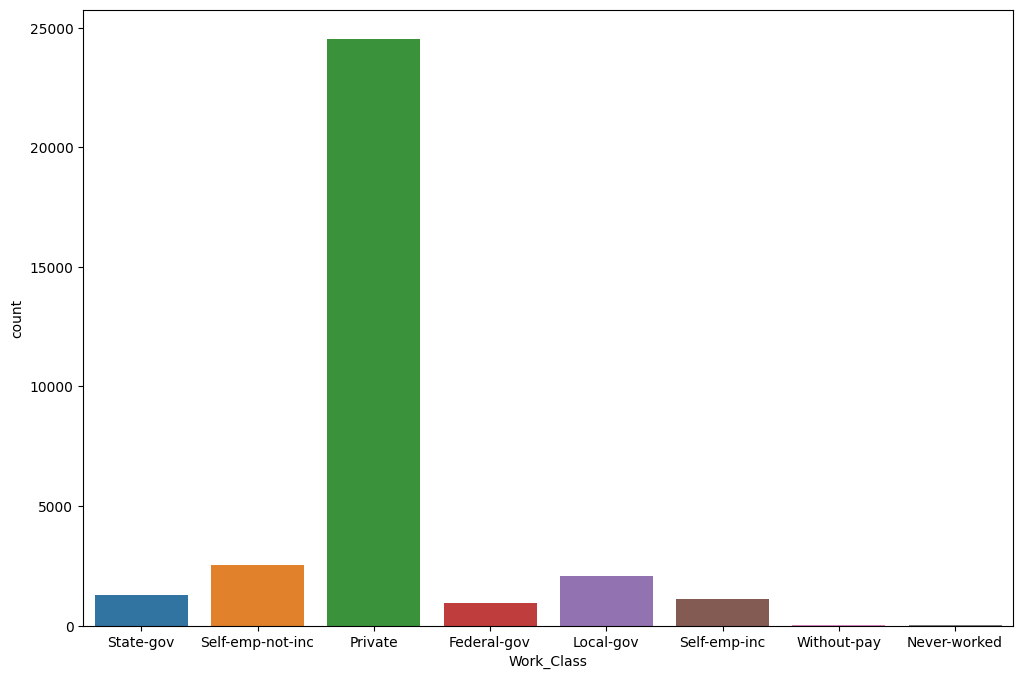

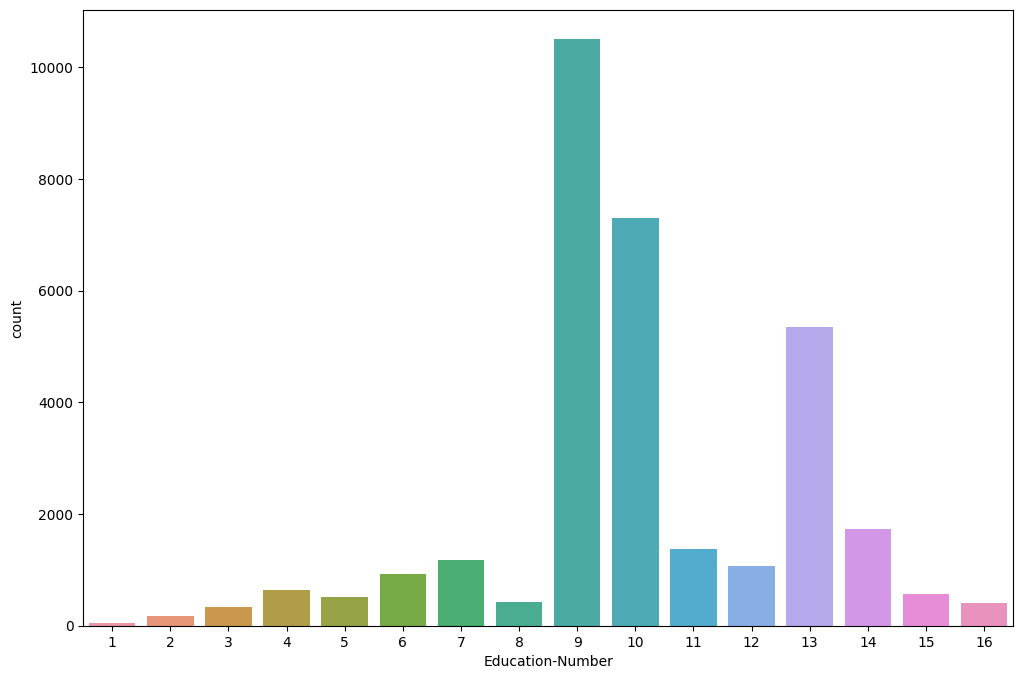

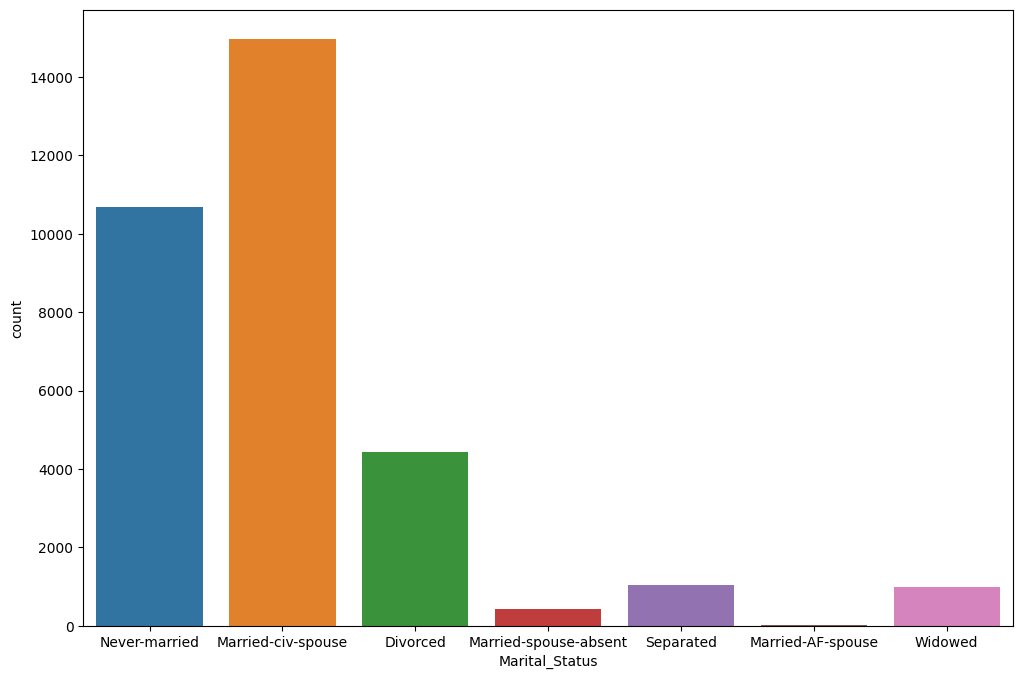

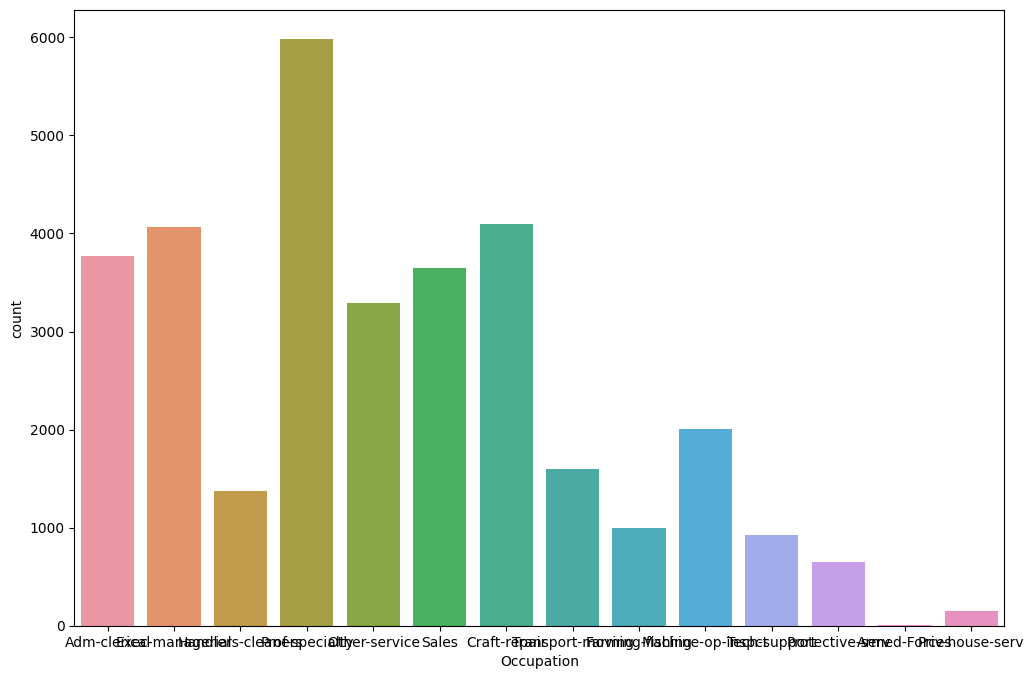

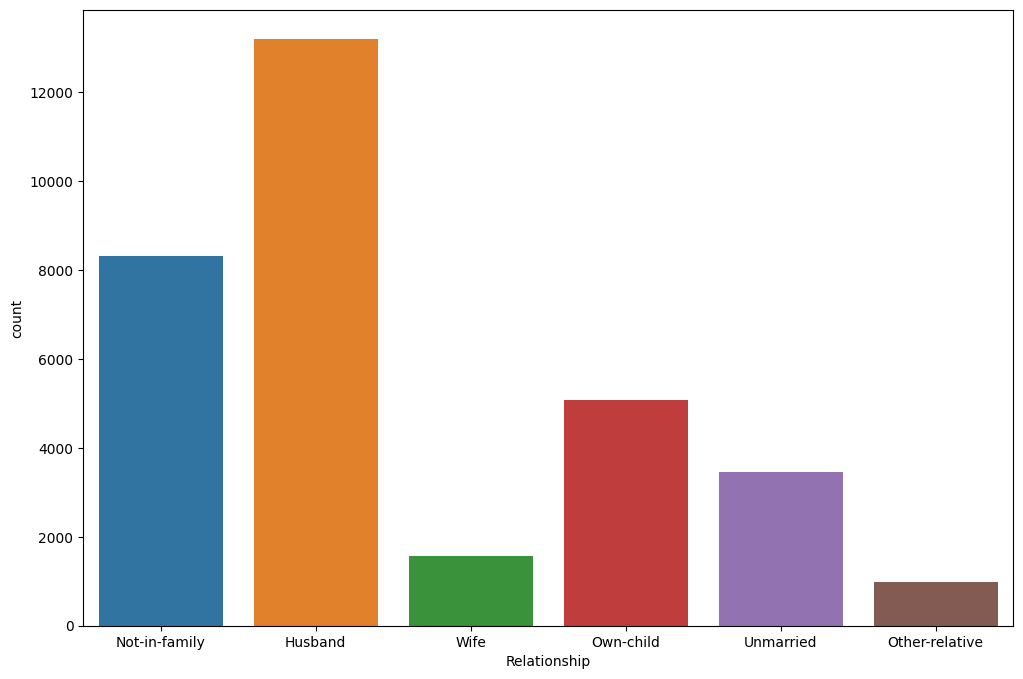

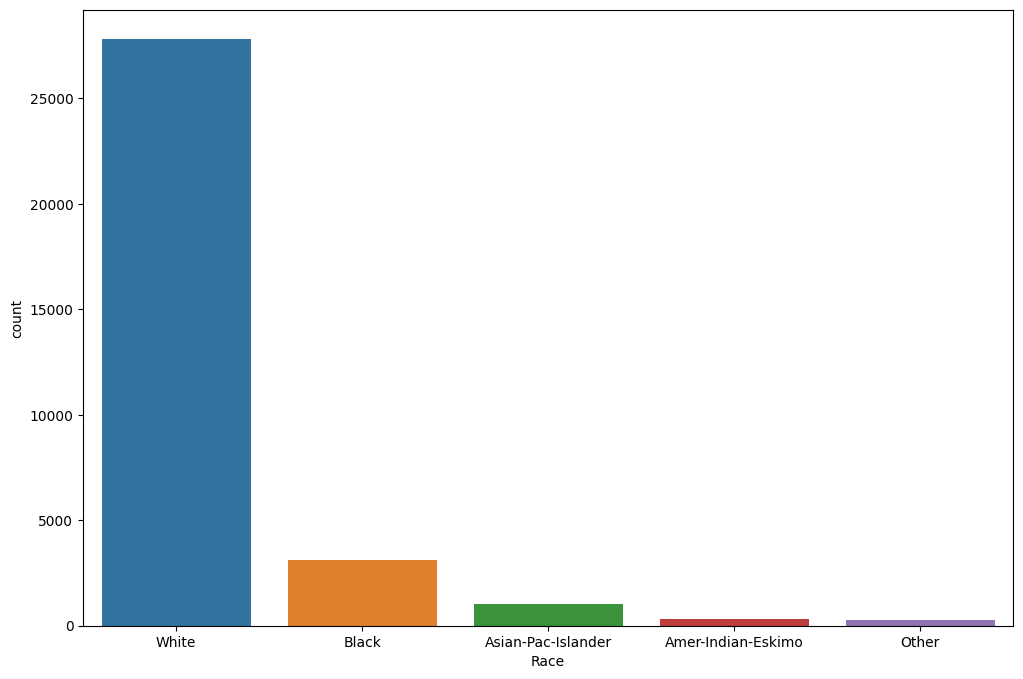

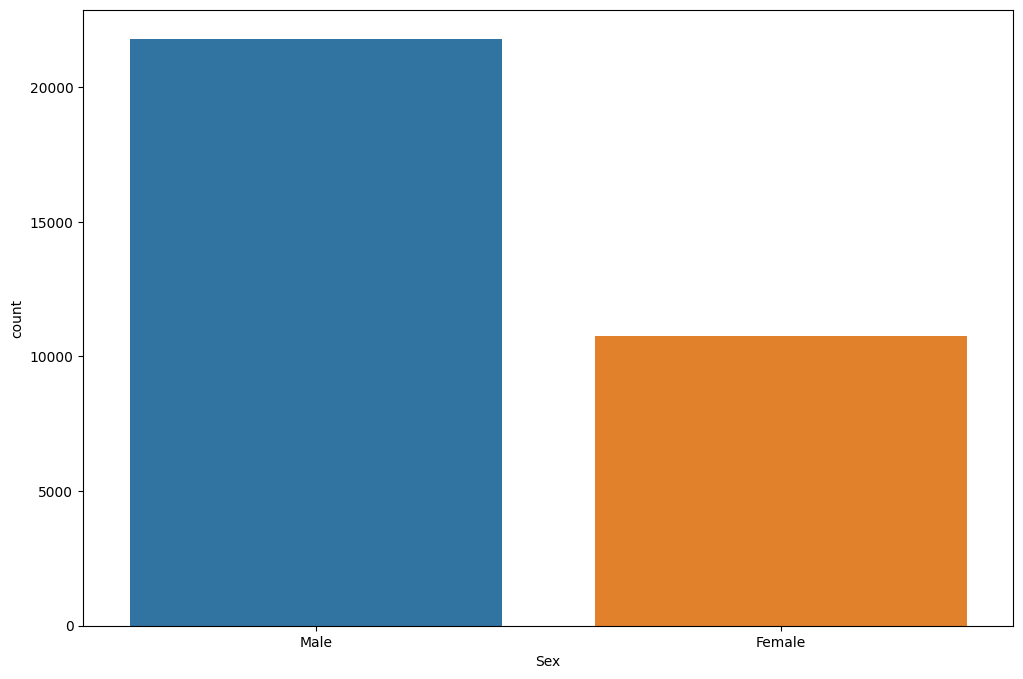

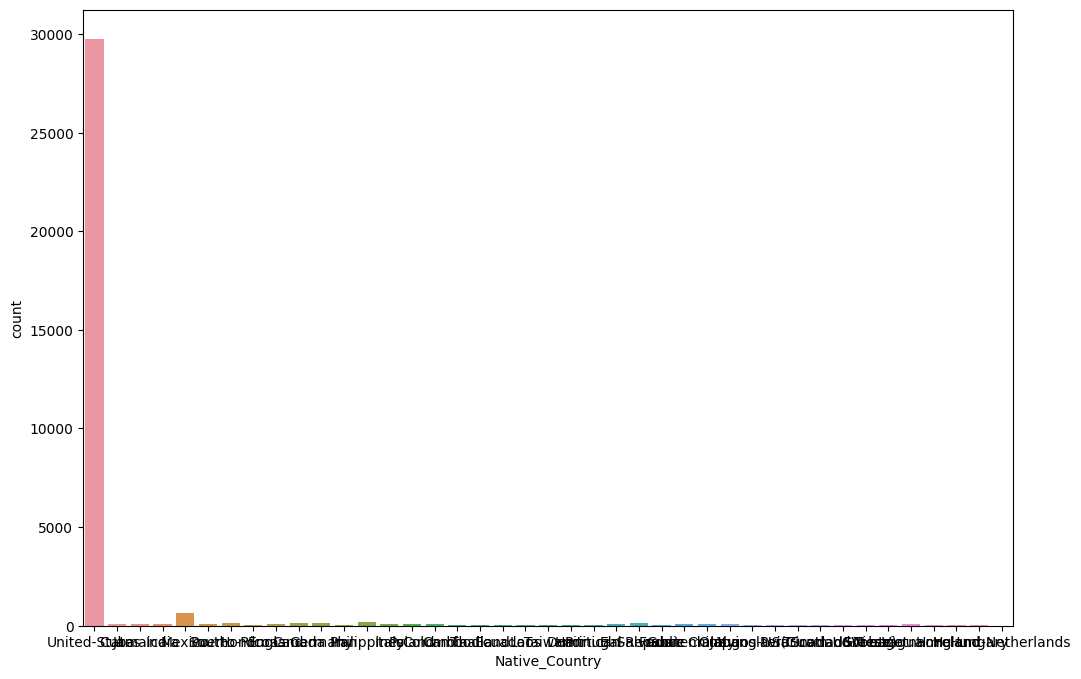

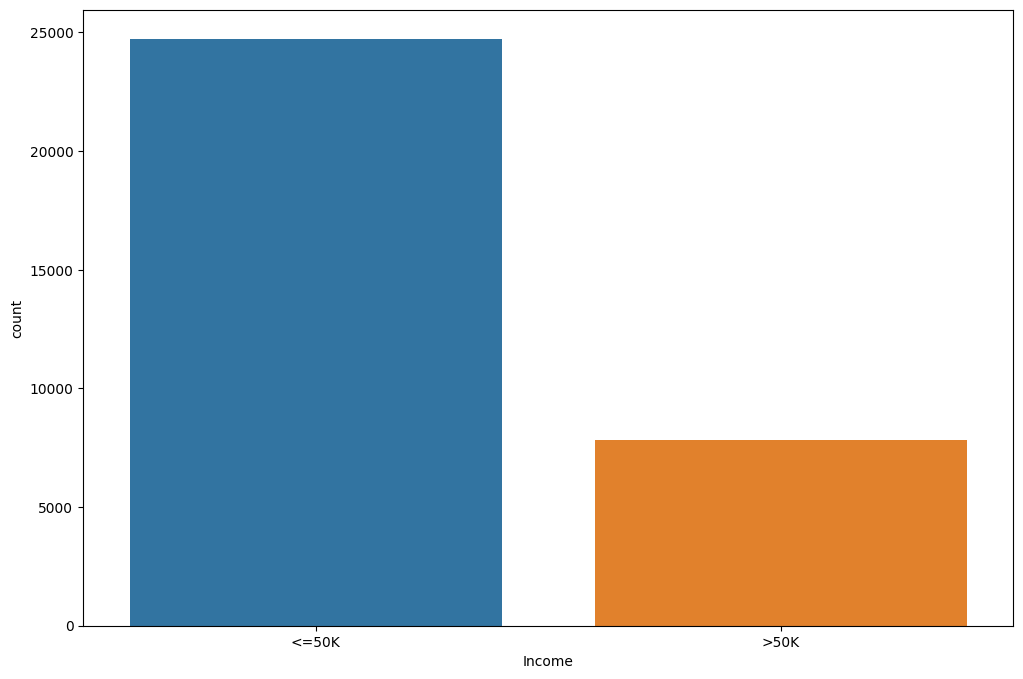

In [19]:
# drawing bar countplots for all categorical attributes
for column in train.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(x=f'{column}', data=train)
    plt.show()

Here we can see the plots for categorical attributes. These plots help us further analyze and organize the dataset.

In [20]:
train.drop('Native_Country', axis=1, inplace=True)
test.drop('Native_Country', axis=1, inplace=True)

Going through the plots, it can be seen that `Native_Country` is very imbalanced, as United States seems to be the major native country. Here for academic purposes, we drop this attribute, however it is not recommended to easily remove attributes.

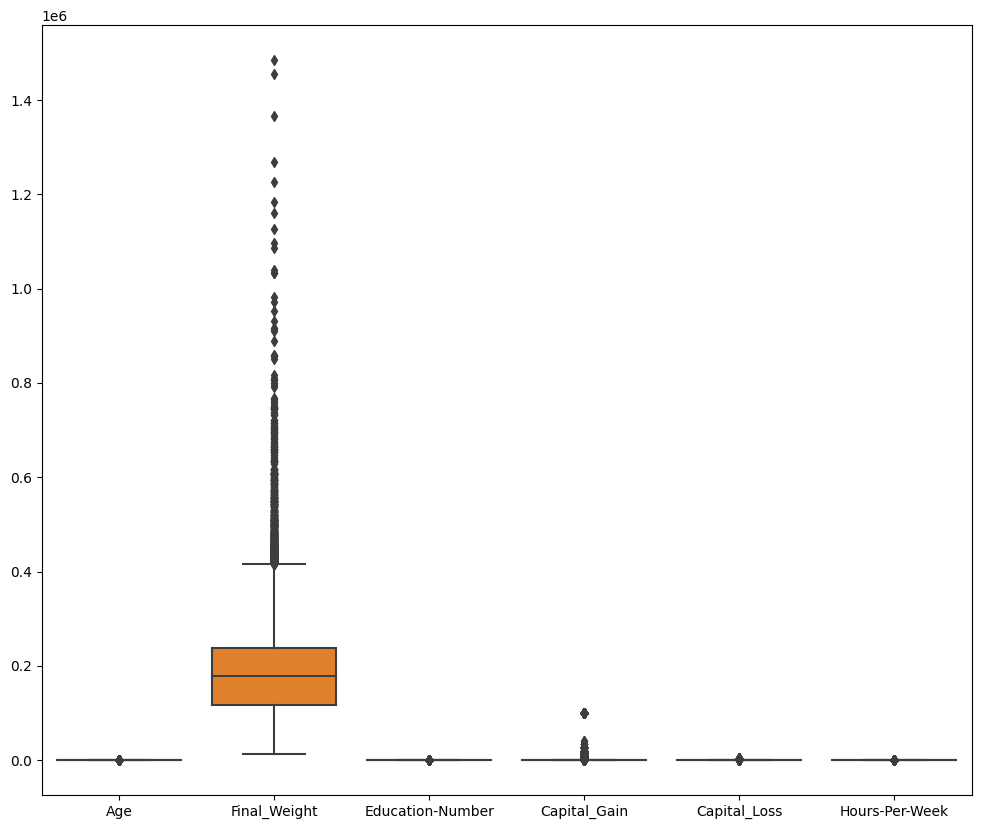

In [21]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=train)
plt.show()

Moving on with numerical attributes, we can see from this plot that there are outliers using IQR. However there are so many outliers and further analysis is needed. Ignoring statistics for the purpose of the assignment, we ignore outliers for now.

<ipython-input-22-1ffe726fbe40>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


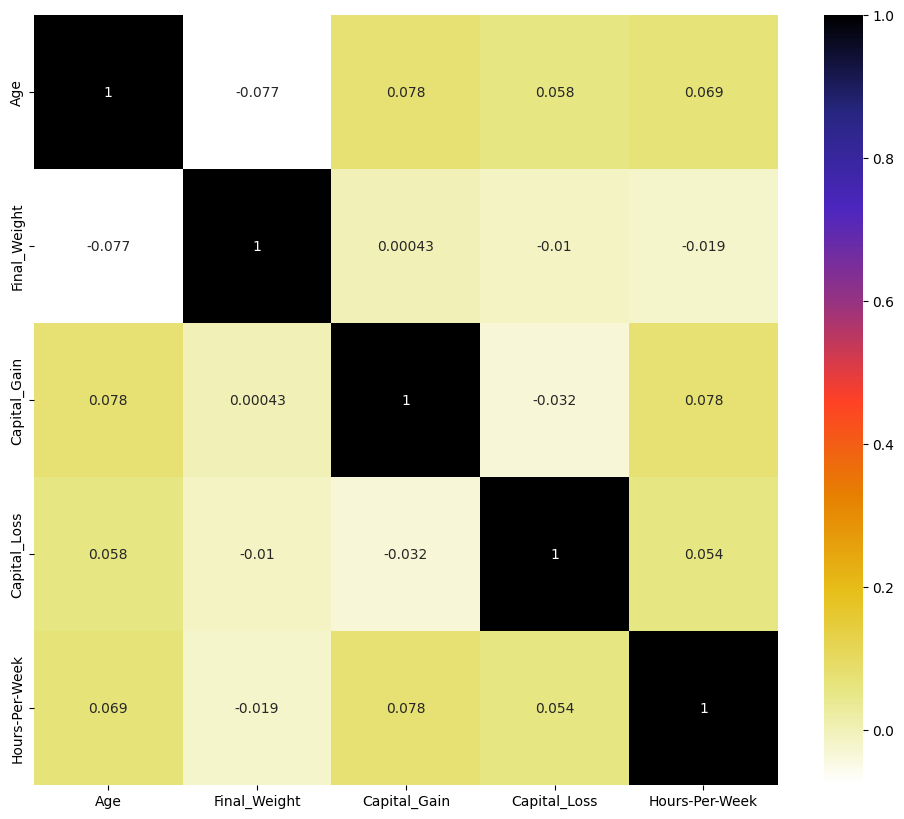

In [22]:
plt.figure(figsize=(12, 10))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

No high correlation is seen between the attributes.

In [23]:
X_train = train.drop('Income', axis=1)
X_test = test.drop('Income', axis=1)
y_train = train['Income']
y_test = test['Income']

Here the train and test sets are each splitted to X and y.

## Encoding Data

In [24]:
train.select_dtypes(include='object')

,Work_Class,Education-Number,Marital_Status,Occupation,Relationship,Race,Sex,Income
0,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K
1,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K
2,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,<=50K
3,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<=50K
4,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,<=50K
...,...,...,...,...,...,...,...,...
32556,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,<=50K
32557,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,>50K
32558,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,<=50K
32559,Private,9,Never-married,Adm-clerical,Own-child,White,Male,<=50K


First we check all the categorial features. We can say that `Education-Number` is ordinal, and the order of the variables affect the income. However, for other attributes, no specific ordinality is seen which affects income. `Education-Number` is now encoded, as seen above, and we move to other attributes.

In [25]:
dummy_columns = list(set(X_train.select_dtypes(include='object').columns) - {'Education-Number'})
# print(dummy_columns)
X_train_ohe = pd.get_dummies(X_train, prefix=dummy_columns, columns=dummy_columns)
X_test_ohe = pd.get_dummies(X_test, prefix=dummy_columns, columns=dummy_columns)

`X_train` and `X_test` are one-hot encoded. One-hot encoding moves variables in categorical features to the column set, and is used because there is no ordinality.

In [26]:
X_train.shape[1] == X_test.shape[1]

True

Since the encoding is done *after* splitting data into train and test sets, the number of columns in both test and train sets are checked to be the same.

In [27]:
y_train = y_train.apply(lambda x: 0 if x == '<=50K' else 1)
y_test = y_test.apply(lambda x: 0 if x == '<=50K' else 1)

After reading https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html, we label $y$ as is seen above.

So $y = 1$ means an income of greater than $50K$ and $y = 0$ means otherwise.

# Model Building, Training and Evaluation

In [28]:
scaler = StandardScaler()
scaler.fit(X_train_ohe)

X_train_ohe_scaled = scaler.transform(X_train_ohe)
X_test_ohe_scaled = scaler.transform(X_test_ohe)

Here the features are scaled. KNN and SVM need scaled data as they are distance based.

## KNN

In [29]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
# define grid search
grid = dict(n_neighbors=n_neighbors)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_ohe_scaled, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.836225 using {'n_neighbors': 15}
0.797191 (0.003229) with: {'n_neighbors': 1}
0.821146 (0.001729) with: {'n_neighbors': 3}
0.829080 (0.003088) with: {'n_neighbors': 5}
0.831158 (0.002592) with: {'n_neighbors': 7}
0.832888 (0.003049) with: {'n_neighbors': 9}
0.834065 (0.002635) with: {'n_neighbors': 11}
0.835038 (0.003240) with: {'n_neighbors': 13}
0.836225 (0.003422) with: {'n_neighbors': 15}
0.836061 (0.002867) with: {'n_neighbors': 17}
0.835816 (0.003380) with: {'n_neighbors': 19}


We use gridsearch for hypertuning, and we ignore metric and weights parameters, and let them be the defaults. So after running grid search we set $K = 15$ be the number of neighbors. For $K > 15$ we see a decrease in accuracy.

The code is from https://machinelearningmastery.com/.

In [30]:
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train_ohe_scaled, y_train)

y_pred = neigh.predict(X_test_ohe_scaled)
y_pred

array([0, 0, 1, ..., 1, 0, 1])

The model is built and trained on train data and predicts using `X_test_ohe_scaled`. One of the hyperparameters is `metric`, which is by default `minkowski`, a generalization of `euclidean` and `manhattan` distances, and is left to be so. The other hyperparameter is the number of neighbors, $K$, denoted by `n_neighbors` which we set to be $15$ as we found out above.

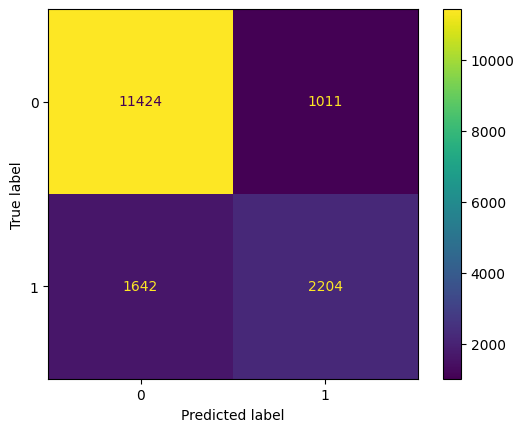

In [31]:
# displaying confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=neigh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()
plt.show()

The confusion matrix for KNN model is drawn above.

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.69      0.57      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.75      0.76     16281
weighted avg       0.83      0.84      0.83     16281



Recall for 0's is so high which is really good, which means from all the 0's 92% are predicted correctly. However the recall for 1's is not that great. Looking back at the bar plot for `income`, we can conclude that it's because of the imbalanced values of $y$.

The precision is good, not perfect again.

The accuracy is good as well, but again not perfect.

## SVM

In [33]:
svc = SVC()
svc.fit(X_train_ohe_scaled, y_train)

y_pred = svc.predict(X_test_ohe_scaled)
y_pred

array([0, 0, 1, ..., 1, 0, 1])

The SVM model is built without changing the default values. The regularization parameter, $C$ is $1.0$ and rbf kernel is used.

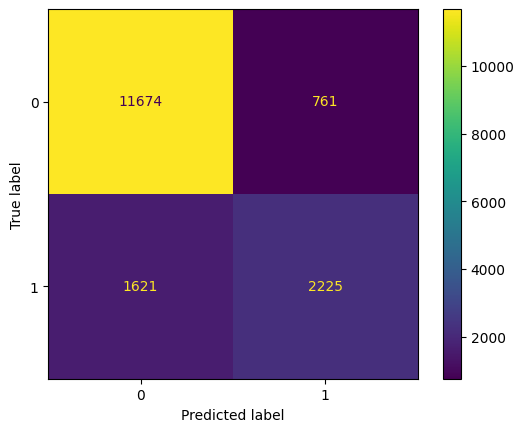

In [34]:
# displaying confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=neigh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()
plt.show()

The confusion matrix for SVM model is drawn above.

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12435
           1       0.75      0.58      0.65      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.76      0.78     16281
weighted avg       0.85      0.85      0.85     16281



Comparing the results to KNN, we can see not so much difference. The values are so close to each other such that it seems there is no difference between the models at all!

This can be due to the nature of the two models being so close to each other.

## Decision Tree

In [36]:
le = preprocessing.LabelEncoder()

categorical_columns = list(X_train.select_dtypes(['object']).columns)
numerical_columns = list(set(X_train.columns) - set(X_train.select_dtypes(['object']).columns))
X_train_le = pd.concat([X_train[categorical_columns].apply(le.fit_transform), X_train[numerical_columns]], axis=1)
X_test_le = pd.concat([X_test[categorical_columns].apply(le.fit_transform), X_test[numerical_columns]], axis=1)

Decision tree models are tree based in nature, and so one-hot encoding them isn't beneficial here at all due to sparsity, and it may even make the model worse. The nodes can easily determine categorical or numerical data, and so the only encoding done here is label encoding. The label encoder in scikit learn is not recommended to be used for $X$, however here is used for simplicity and it does the job just fine.

In [38]:
decision_tree = DecisionTreeClassifier(max_depth=2, random_state=0)
decision_tree.fit(X_train_le, y_train)

y_pred = decision_tree.predict(X_test_le)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

The DT model is built without changing the default values. By default gini impurity is used as the criterion.

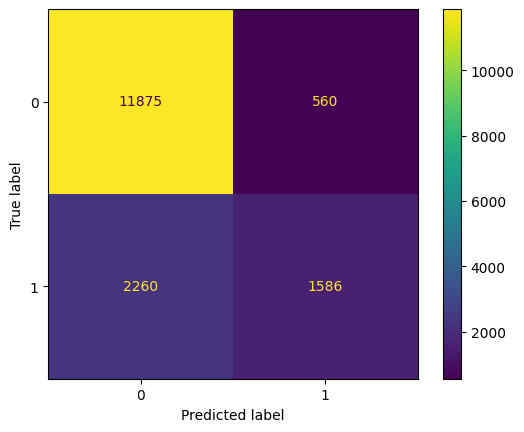

In [39]:
# displaying confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=neigh.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh.classes_)
disp.plot()
plt.show()

The confusion matrix for decision tree model is drawn above.

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     12435
           1       0.74      0.41      0.53      3846

    accuracy                           0.83     16281
   macro avg       0.79      0.68      0.71     16281
weighted avg       0.82      0.83      0.81     16281



Not so much difference in seen between this model and the other two.

Comparing the the three modes' f1-scores, the decision tree doesn't seem to be a good choice. The model may have become too specific the the train data and so so doesn't behave too well on test set. However there is not much difference between the metrics, so further analysis is still required.